# Data Augmentation

Data augmentation occurs when you create new data based on modifications of your existing data. In our case, our data will be images. Data augmentation on images would include transformation like:
- Flipping the image either horizontaly or vertically
- Rotating the image
- Zooming in or out on the image 
- Cropping the image
- Varying the color on the image

In [28]:
import matplotlib.pyplot as plt
import numpy as np 
import os
import random
import keras
from keras import backend as k
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
%matplotlib inline

In [34]:
# plot images
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 10, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

In [47]:
gen = ImageDataGenerator(rotation_range=30,
                         width_shift_range = 0.1,
                         height_shift_range = 0.1,
                         shear_range = 0.15,
                         zoom_range = 0.2,
                         channel_shift_range = 20,
                         horizontal_flip = True)

In [4]:
%mkdir data
%cd data/

/content/data


In [5]:
from google.colab import files
upload = files.upload()

Saving lizard.png to lizard.png


In [6]:
%cd ../

/content


In [19]:
image_path = 'data/lizard.png'

In [29]:
#obtain image
img = load_img(image_path)
x = img_to_array(img)
x =  x.reshape((1,)+x.shape) # this is a numpy array of dimention (1,3, -- , ---)

In [30]:
# for the purpose of saving the images
i = 0
for batch in gen.flow(x, batch_size=1, save_to_dir='data', save_prefix='liz', save_format='jpeg'):
  i += 1
  if i>10:
    break;

In [49]:
# for the purpose of displaying the image
aug_iter = gen.flow(x)

In [50]:
# get 10 samples of augmented images
aug_images = [next(aug_iter)[0].astype(np.uint8) for i in range(10)]

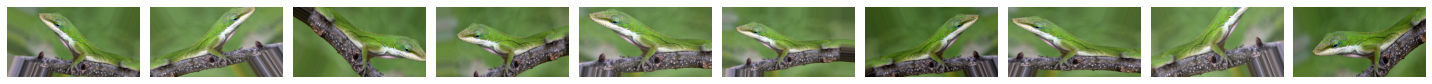

In [51]:
plotImages(aug_images)

## Save the images

In [37]:
aug_iter = gen.flow(x, save_to_dir='data', save_format='png', save_prefix='lizard-chk-')

In [38]:
aug_images = [next(aug_iter)[0].astype(np.uint8) for i in range(10)]